<a href="https://colab.research.google.com/github/donaldkinyafisher/INF8250AE-MARL-NOTEBOOK/blob/main/Copie_de_Copie_de_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# @title Import
%%capture
!pip install gymnasium pettingzoo matplotlib numpy
!pip install stable-baselines3
!pip install shimmy>=2.0

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arrow, ConnectionPatch

import seaborn as sns
from IPython.display import HTML, display,Markdown, Math
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Markdown, display
from IPython.display import Math
from IPython.display import Image
from IPython.display import display, HTML
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from pettingzoo.mpe import simple_spread_v3
from IPython.display import Image, display, Markdown
from ipywidgets import interactive
from PIL import Image as PILImage
import os

# 1. Introduction

In [ ]:
#@title Tutorial track
intro_text = """
<style>
    /* Title Styling */
      .intro-title {
        font-size: 30px;
        font-weight: bold;
        color: #FF6347;
        text-align: center;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);
        animation: fadeIn 2s ease-in-out;
    }

    /* Text Block Styling */
    .intro-text {
        font-size: 18px;
        line-height: 1.8;
        color: #555;
        max-width: 800px;
        margin: 20px auto;
        padding: 25px;
        border-radius: 8px;
        background: #F5F5F5;
        box-shadow: 0 6px 12px rgba(0, 0, 0, 0.1);
        transition: transform 0.3s ease, background 0.3s ease;
    }

    /* Hover effect for the text block */
    .intro-text:hover {
        transform: scale(1.03);
        background: #E0E0E0;
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.15);
    }

    /* Fade-in effect for title */
    @keyframes fadeIn {
        from { opacity: 0; }
        to { opacity: 1; }
    }
</style>

<h2 class="intro-title">Exploring the Evolution from Single-Agent to Multi-Agent RL</h2>

<div class="intro-text">
    <p>In this tutorial, we explore the transition from single-agent reinforcement learning (RL) to multi-agent reinforcement learning (MARL). This progression is crucial for tackling real-world problems where multiple agents must interact, cooperate, or compete in dynamic environments. The challenges introduced by these multi-agent setups—such as coordination, scalability, and non-stationarity—require novel approaches and algorithms. By the end of this tutorial, you will understand the foundational concepts of MARL and how single-agent RL strategies can be extended to multi-agent domains.</p>
</div>
"""

display(HTML(intro_text))





## Why MARL Matters



- **Realistic Modeling**: MARL is more aligned with real-world environments, where multiple agents interact and make decisions based on the actions of others.
- **Coordination and Competition**: MARL enables agents to either cooperate (coordination) or compete with each other, which mirrors many real-world scenarios where both dynamics exist.
- **Scalability**: MARL systems can scale to handle larger, more complex problems than SARL alone.
- **Adaptability**: MARL enables agents to learn and adapt in real-time, responding to changes in their environment or among other agents.
- **Real-World Impact**: MARL offers practical solutions for industries such as robotics, autonomous vehicles, energy systems, and healthcare, where cooperation or competition between agents is essential for success.*texte en italique*



In [ ]:
# @title
# Displaying the GIF from the URL
gif_url = "https://upload.wikimedia.org/wikipedia/commons/3/37/Multi_give_way_%284_agents%2C_each_trying_to_reach_a_specific_point%29.gif"
Image(url=gif_url)


## Real-World Applications


MARL plays a pivotal role in solving complex, real-world challenges where multiple agents interact within dynamic environments. By allowing agents to cooperate, compete, and adapt, MARL enables systems to handle tasks that are difficult or impossible for single-agent systems to manage. Below are some key areas where MARL is making a significant impact

In [ ]:
# @title Example
import ipywidgets as widgets
from IPython.display import display, HTML, Image

domains = {
    "Robotics": {
        "description": (
            "In collaborative robotics, MARL enables multiple robots to coordinate and "
            "perform tasks such as exploration, disaster response, or assembly. "
            "For instance, a team of drones can distribute responsibilities for mapping or delivering supplies "
            "in disaster-affected areas, dynamically adapting to environmental changes."
        ),
        "applications": [
            "- Search and rescue operations",
            "- Warehouse management",
            "- Agricultural monitoring",
            "- Construction automation",
        ],
        "image": "https://dp9eps5gd5xd0.cloudfront.net/image-handler/ts/20230831083549/ri/850/src/images/news/ImageForNews_14271_169348534600376.jpg",
        "references": [
            "[1] Brown, et al. (2023). 'Swarm Intelligence through Multi-Agent Learning.' Robotics and Autonomous Systems.",
            "[2] Smith, et al. (2022). 'Cooperative Multi-Robot Task Allocation.' Science Robotics."
        ]
    },
    "Autonomous Vehicles": {
        "description": (
            "In autonomous driving, MARL enables multiple vehicles to learn cooperative behaviors "
            "such as merging lanes, optimizing traffic flow, or preventing collisions. "
            "For example, cars at a busy intersection can learn to prioritize movements without centralized traffic control."
        ),
        "applications": [
            "- Intersection management",
            "- Lane merging coordination",
            "- Platoon formation",
            "- Collision avoidance"
        ],
        "image": "https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdm9keGxsZjRkd2VpOGN4eG1sZzNuaTN2N3N6cWRyZThxdjJveWdmYiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/H7rpSYHRyYgamxQNqw/giphy.gif",
        "references": [
            "[1] Wang, et al. (2023). 'Multi-Agent Reinforcement Learning for Connected Autonomous Vehicles.' IEEE Trans. Intelligent Transportation Systems.",
            "[2] Chen, et al. (2022). 'Cooperative Multi-Agent Systems for Automated Driving.' Nature Machine Intelligence."
        ]
    },
    "Energy Systems": {
        "description": (
            "MARL optimizes decentralized energy systems by coordinating power allocation between "
            "producers and consumers. For instance, agents representing wind turbines and energy storage units "
            "can learn to balance supply and demand dynamically, minimizing wastage."
        ),
        "applications": [
            "- Demand-response management",
            "- Distributed energy resource coordination",
            "- Grid stability maintenance",
            "- Real-time pricing optimization"
        ],
        "image": "https://miro.medium.com/v2/resize:fit:1400/format:webp/0*2GlP-gE7hptc1PeC.gif",
        "references": [
            "[1] Zhang, et al. (2023). 'Multi-Agent Deep Reinforcement Learning for Smart Grid Control.' Energy and Buildings.",
            "[2] Liu, et al. (2022). 'Distributed Energy Management using Multi-Agent Systems.' Applied Energy."
        ]
    },
    "Healthcare": {
        "description": (
            "In healthcare, MARL helps allocate resources like ICU beds or optimize medical equipment usage. "
            "For example, agents can learn to manage patient schedules and equipment dynamically, ensuring that "
            "emergent needs are prioritized efficiently."
        ),
        "applications": [
            "- ICU bed allocation",
            "- Medical equipment scheduling",
            "- Emergency resource management"
        ],
        "image": "https://standexelectronics.com/wp-content/uploads/HospitalBedSensor.gif",
        "references": [
            "[1] Zhao, et al. (2023). 'Multi-Agent Reinforcement Learning for Healthcare Resource Management.' Journal of Medical Systems."
        ]
    }
}

dropdown = widgets.Dropdown(
    options=domains.keys(),
    description="Domain:",
    value="Robotics"
)

output = widgets.Output()

def update_content(change):
    with output:
        output.clear_output()
        domain = change["new"]
        info = domains[domain]

        display(HTML(f"""
            <style>
                h4 {{ font-size: 22px; font-weight: bold; color: #2E4053; }}
                p, li {{ font-size: 16px; line-height: 1.5; color: #4F4F4F; }}
                ul {{ margin-left: 20px; }}
                button {{
                    background-color: #4CAF50;
                    color: white;
                    padding: 10px;
                    border: none;
                    cursor: pointer;
                }}
                button:hover {{ background-color: #45a049; }}
            </style>
        """))

        display(HTML(f"<h4>{domain}</h4><p>{info['description']}</p>"))
        display(HTML("<ul>" + "".join([f"<li>{app}</li>" for app in info["applications"]]) + "</ul>"))
        display(Image(url=info["image"], width=400, height=300))

        display(HTML(f'<button onclick="this.nextElementSibling.style.display=\'block\'">Show References</button><div style="display:none;">'
                     + "<ul>" + "".join([f"<li>{ref}</li>" for ref in info["references"]]) + "</ul></div>"))

dropdown.observe(update_content, names="value")

display(dropdown, output)


Dropdown(description='Domain:', options=('Robotics', 'Autonomous Vehicles', 'Energy Systems', 'Healthcare'), v…

Output()


#From Single-Agent to Multi-Agent: Understanding the Fundamental Shift



In this section, we'll explore the fundamental transition from SARL to MARL. We'll use interactive visualizations to understand why MARL requires a different framework than traditional MDPs.

## **Mathematical Foundations: The Evolution from MDP to Markov Games**

Let's break down the key components and see how they evolve from SARL to MARL.


In [ ]:
# @title SARL vs MARL
from IPython.display import HTML, display

def display_mathematical_comparison():
    mdp_html = """
    <div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; margin: 10px; width: 48%; box-sizing: border-box; font-size: 18px; transition: transform 0.3s ease;">
        <h3 style="font-size: 22px;">Markov Decision Process (MDP)</h3>
        <p>MDP = <span id="mdp_eq1">\( (S, A, P, R, \gamma) \)</span></p>
        <ul>
            <li><span id="mdp_eq2">\( S \): State space</span></li>
            <li><span id="mdp_eq3">\( A \): Action space</span></li>
            <li><span id="mdp_eq4">\( P: (S, A, S) \, \&rarr; \, [0,1] \)</span></li>
            <li><span id="mdp_eq5">\( R: (S, A, S) \, \&rarr; \, \mathbb{R} \)</span></li>
            <li><span id="mdp_eq6">\( \gamma \in [0,1] \): Discount factor</span></li>
        </ul>
    </div>
    """

    markov_game_html = """
    <div style="background-color: #e6f3ff; padding: 20px; border-radius: 10px; margin: 10px; width: 48%; box-sizing: border-box; font-size: 18px; transition: transform 0.3s ease;">
        <h3 style="font-size: 22px;">Markov Game</h3>
        <p>MG = <span id="mg_eq1">\( (N, S, \{A_i\}_{i=1}^N, P, \{R_i\}_{i=1}^N, \gamma) \)</span></p>
        <ul>
            <li><span id="mg_eq2">\( N \): Number of agents</span></li>
            <li><span id="mg_eq3">\( S \): Joint state space</span></li>
            <li><span id="mg_eq4">\( A_i \): Action space for agent \( i \)</span></li>
            <li><span id="mg_eq5">\( P: (S, A_1, \dots, A_N, S) \, \&rarr; \, [0,1] \)</span></li>
            <li><span id="mg_eq6">\( R_i: (S, A_1, \dots, A_N, S) \, \&rarr; \, \mathbb{R} \)</span></li>
            <li><span id="mg_eq7">\( \gamma \in [0,1] \): Discount factor</span></li>
        </ul>
    </div>
    """

    # Add MathJax script to render the math formulas
    display(HTML(f"""
    <script type="text/javascript" async
      src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
    </script>
    <div style="display: flex; justify-content: space-between; gap: 20px; flex-wrap: wrap; padding: 20px;">
        {mdp_html}
        {markov_game_html}
    </div>
    <style>
        div:hover {{
            transform: scale(1.01);
            box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);
        }}
    </style>
    """))

display_mathematical_comparison()


In [ ]:
# @title Illustration
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

def create_environment_comparison(n_agents=2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    ax1.set_title('Single-Agent Environment')
    circle = plt.Circle((0.5, 0.5), 0.3, color='b', alpha=0.3)
    ax1.add_artist(circle)
    ax1.plot(0.5, 0.5, 'b.', markersize=15, label='Agent')
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.legend()

    ax2.set_title('Multi-Agent Environment')
    colors = ['b', 'r', 'g', 'm']
    markers = ['.', 's', '^', 'o']
    for i in range(n_agents):
        circle = plt.Circle((0.3 + i*0.2, 0.5), 0.15, color=colors[i], alpha=0.3)
        ax2.add_artist(circle)
        ax2.plot(0.3 + i*0.2, 0.5, color=colors[i], marker=markers[i],
                 markersize=15, label=f'Agent {i+1}')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.legend()

    plt.tight_layout()
    return fig

def show_environment_comparison(n_agents):
    """
    Displays the comparison between a single-agent and multi-agent environment.

    Args:
        n_agents (int): The number of agents in the multi-agent environment.

    The function prints the sizes of the state space and action space for both environments
    and creates an interactive visualization comparing the environments.
    """
    state_space_single_agent = 5
    action_space_single_agent = 4

    state_space_multi_agent = state_space_single_agent ** n_agents
    action_space_multi_agent = action_space_single_agent ** n_agents

    print(f"Single-Agent Environment (State Space Size: {state_space_single_agent}, Action Space Size: {action_space_single_agent})")
    print(f"Multi-Agent Environment ({n_agents} Agents) - Joint State Space Size: {state_space_multi_agent}, Joint Action Space Size: {action_space_multi_agent}")

    fig = create_environment_comparison(n_agents)
    plt.show()

interact(show_environment_comparison, n_agents=widgets.IntSlider(min=2, max=4, step=1, value=2,
                                                               description='Number of Agents:',
                                                               style={'description_width': 'initial'}))


interactive(children=(IntSlider(value=2, description='Number of Agents:', max=4, min=2, style=SliderStyle(desc…

<function __main__.show_environment_comparison(n_agents)>

#### Conclusion on the Evolution of State Space and Action Space

- **Single-Agent Environment**:
  - State space: $S$
  - Action space: $A$

- **Multi-Agent Environment ($N$ agents)**:
  - **Joint State Space**: $S_{\text{joint}} = S^N$  
    The state space grows **exponentially** with the number of agents, as it represents all possible combinations of states for $N$ agents.
  - **Joint Action Space**: $A_{\text{joint}} = A^N$  
    Similarly, the action space grows **exponentially**, reflecting all possible combinations of actions taken by $N$ agents simultaneously.

---

#### Implications
- The **exponential growth** of state and action spaces with $N$ agents leads to significant computational challenges in modeling and solving multi-agent environments.
- Addressing this complexity often requires:
  - Efficient representations of the state and action spaces.
  - **Decentralized strategies** to reduce the dimensionality of the problem.
  - Utilizing approximations or hierarchical methods in reinforcement learning.


### Types of MARL



MARL involves multiple agents interacting in a shared environment. The agents’ behaviors depend on their own actions as well as the actions of others. The main types of MARL are as follows:

- **Competitive MARL**:
  - Agents compete against each other.
  - The reward for each agent is typically inversely related to the rewards of others, meaning that one agent’s gain comes at the expense of another’s loss.
  
  Mathematically, the reward for agent $i$ is:
  $
  R_i(s, a_1, a_2, \dots, a_N)
  $
  where $s$ is the state and $a_1, a_2, \dots, a_N$ are the actions of all agents.

- **Cooperative MARL**:
  - All agents share a common goal and work together to maximize the total reward.
  - The reward is the same for all agents in a given state-action pair.

  $
  R_i(s, a_1, a_2, \dots, a_N) = R(s, a_1, a_2, \dots, a_N)
  $
  where $R$ is the shared reward across agents.

- **Mixed MARL**:
  - Mixed MARL combines both competitive and cooperative behaviors.
  - Some agents may cooperate for certain tasks, while still competing for individual rewards.
  $
  R_i(s, a_1, a_2, \dots, a_N) = R_c(s, a_1, a_2, \dots, a_N) + R_p(s, a_1, a_2, \dots, a_N)
  $
  where $R_c$ is the cooperative component and $R_p$ is the competitive component.

### Payoff Matrix

A **payoff matrix** represents the outcomes (payoffs) for each agent based on their chosen strategies. It’s a useful tool for analyzing strategic decisions in games.

In a two-player game, the matrix is represented as:

$$
\begin{array}{|c|c|c|}
\hline
& \text{Player 2: Strategy 1} & \text{Player 2: Strategy 2} \\
\hline
\text{Player 1: Strategy 1} & (R_1, R_2) & (R_3, R_4) \\
\hline
\text{Player 1: Strategy 2} & (R_5, R_6) & (R_7, R_8) \\
\hline
\end{array}
$$


Where $(R_1, R_2)$, etc., represent the payoffs for Player 1 and Player 2 based on their strategies.

In MARL, the payoff matrix helps analyze how agents' interactions affect outcomes in Competitive, Cooperative, and Mixed settings.


In [ ]:
# @title Payoff Matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact
from IPython.display import display, Markdown

def create_marl_types_visualization():
    competitive = np.array([[1,-1], [-1,1]])
    cooperative = np.array([[2,0], [0,2]])
    mixed = np.array([[2,-1], [-1,2]])

    def plot_payoff_matrix(matrix, title):
        fig = plt.figure(figsize=(6, 4))
        sns.heatmap(matrix, annot=True, cmap='RdYlBu', center=0)
        plt.title(title)
        return fig

    @interact(marl_type=['Competitive', 'Cooperative', 'Mixed'])
    def show_marl_type(marl_type):
        if marl_type == 'Competitive':
            matrix = competitive
            display(Markdown("""
            Competitive MARL
            - Payoff Matrix: A zero-sum game where the total payoff across all players is zero.
            - Key Characteristic: One player's gain is another player's loss.
            - Example: Two-player games like chess, where players are directly competing.
            """))
        elif marl_type == 'Cooperative':
            matrix = cooperative
            display(Markdown("""
            Cooperative MARL
            - Payoff Matrix: A shared reward system where all agents work towards maximizing the collective reward.
            - Key Characteristic: Agents collaborate to achieve a common goal.
            - Example: Robot swarm coordination, where agents cooperate to achieve a common task.
            """))
        else:
            matrix = mixed
            display(Markdown("""
            Mixed MARL
            - Payoff Matrix: A combination of competitive and cooperative elements.
            - Key Characteristic: Agents have partial alignment of goals but may still compete in certain situations.
            - Example: Traffic management, where cooperation is needed to optimize the system, but individual vehicles still compete for resources like road space.
            """))

        plot_payoff_matrix(matrix, f'{marl_type} MARL - Payoff Matrix')
        plt.show()

create_marl_types_visualization()


interactive(children=(Dropdown(description='marl_type', options=('Competitive', 'Cooperative', 'Mixed'), value…

##  **Key Challenges MARL**


MARL introduces unique challenges due to interactions between agents and the environment. Addressing these challenges is essential for building robust multi-agent systems.


### 🚩 **1. Non-Stationarity**


In MARL, agents interact with each other in a shared environment. A key challenge is **non-stationarity** — the environment changes dynamically as agents adapt their policies. This creates instability and hinders learning.

---

**The Problem**

In a multi-agent setup:  
- Each agent's policy affects the environment.  
- When one agent updates its policy, the environment effectively changes for all other agents.  
- This violates the stationary environment assumption of standard reinforcement learning algorithms.

---

**Mathematical Formalism**

1. **Environment Dynamics**:  
   The environment’s state transition depends on all agents' actions:  
   $$
   P(s_{t+1} | s_t, \mathbf{a}_t),
   $$
   where $\mathbf{a}_t = (a_t^1, a_t^2, \dots, a_t^N) $ represents all agents' actions.

2. **Agent-Specific Rewards**:  
   Each agent $i$ learns to maximize its own expected return:  
  $$
   J^i = \mathbb{E} \left[ \sum_{t=0}^T \gamma^t r_t^i \right].
   $$
   However, $r_t^i $ depends on the joint action $\mathbf{a}_t $, which changes as other agents update their policies.

3. **Non-Stationary Policy Updates**:  
   As agent $i$ updates its policy $\pi^i(a^i | s)$, the effective transition and reward functions observed by other agents become time-dependent:  
   $$
   P(s_{t+1} | s_t, \mathbf{a}_t) \text{ and } r_t^j \quad \text{for } j \neq i.
   $$

---

**Impact of Non-Stationarity**

- **Unstable Learning**: Agents cannot converge to optimal policies because their environment (other agents) is constantly changing.  
- **Exploration-Exploitation Tradeoff**: It becomes harder to balance exploring new strategies with exploiting known ones.  
- **Suboptimal Coordination**: Agents might struggle to form effective strategies due to frequent policy changes by others.

---

**Solutions to Non-Stationarity**

1. **Centralized Training with Decentralized Execution (CTDE)**:  
   During training, use a centralized critic that observes all agents' actions and states to stabilize learning.  
   - Example: MADDPG (Multi-Agent Deep Deterministic Policy Gradient).

2. **Opponent Modeling**:  
   Agents explicitly model other agents' policies:  
   $$
   \hat{\pi}^j(a^j | s) \quad \text{for } j \neq i.
   $$





**Illustration Example**: Non-Stationarity in the "Multi-Agent Particle Environment"

- **Environment Description**:
  - **Agents**: Move on a 2D grid to collect and spread objects.
  - **Goal**: The goal is for agents to cooperate and gather objects, maximizing a shared reward.
  - **Actions**: Agents can move in four directions (up, down, left, right) and interact with other agents or objects.

- **Reward Distribution**:
  - In **single-agent** setup: Reward depends on the actions of the single agent, based on how effectively it collects objects.
  - In **multi-agent** setup: The reward is shared among all agents based on their collective actions. Agents might hinder or help each other depending on the interactions.

- **Key Points**:
  - The environment is non-stationary because the actions of multiple agents create dynamic changes in the state.
  - No learning or training: We sample random actions and observe how reward fluctuations occur due to non-stationarity.


In [ ]:
# @title Spread
import numpy as np
import matplotlib.pyplot as plt
from pettingzoo.mpe import simple_spread_v3
from IPython.display import Image, display
import imageio
from ipywidgets import interactive

def initialize_env(N_agents):
    env_single = simple_spread_v3.parallel_env(N=1, render_mode="rgb_array")  # Single-agent setup
    env_multi = simple_spread_v3.parallel_env(N=N_agents, render_mode="rgb_array")  # Multi-agent setup
    return env_single, env_multi

def reset_envs(env_single, env_multi):
    observations_single, infos_single = env_single.reset(seed=42)
    observations_multi, infos_multi = env_multi.reset(seed=42)
    return observations_single, infos_single, observations_multi, infos_multi

def save_gif_from_images(images, filename):
    """Save a sequence of images as a GIF with looping enabled."""
    imageio.mimsave(filename, images, duration=0.1, loop=0)  # loop=0 ensures the GIF repeats indefinitely

def simulate_non_stationarity_with_gif(N_agents, steps=100):
    env_single, env_multi = initialize_env(N_agents)
    observations_single, infos_single, observations_multi, infos_multi = reset_envs(env_single, env_multi)

    rewards_single, rewards_multi = [], []
    images_single, images_multi = [], []

    for _ in range(steps):
        actions_single = {}
        actions_multi = {}

        for agent in env_single.agents:
            actions_single[agent] = env_single.action_space(agent).sample()

        images_single.append(env_single.render())

        observations, rewards, terminations, truncations, infos = env_single.step(actions_single)
        rewards_single.append(sum(rewards.values()))

        for agent in env_multi.agents:
            actions_multi[agent] = env_multi.action_space(agent).sample()

        images_multi.append(env_multi.render())

        observations, rewards, terminations, truncations, infos = env_multi.step(actions_multi)
        rewards_multi.append(sum(rewards.values()))

    return rewards_single, rewards_multi, images_single, images_multi

def plot_with_gif(N_agents=2, steps=100):
    rewards_single, rewards_multi, images_single, images_multi = simulate_non_stationarity_with_gif(N_agents, steps)

    rewards_plot = plt.figure(figsize=(10, 6))
    plt.plot(rewards_single, label='Single-Agent Reward', color='blue')
    plt.plot(rewards_multi, label=f'Multi-Agent Reward (N={N_agents})', color='red')
    plt.title("Non-Stationarity: Reward Fluctuations in Single-Agent vs. Multi-Agent Setting")
    plt.xlabel("Training Steps")
    plt.ylabel("Reward")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    save_gif_from_images(images_single, filename='single_agent.gif')
    save_gif_from_images(images_multi, filename='multi_agent.gif')

    display(Markdown("### **Single-Agent Animation**"))
    display(Image(filename="single_agent.gif"))

    display(Markdown(f"### **Multi-Agent Animation (N={N_agents})**"))
    display(Image(filename="multi_agent.gif"))

interactive_plot = interactive(plot_with_gif, N_agents=(2, 10, 1), steps=(100, 500, 10))
display(interactive_plot)


interactive(children=(IntSlider(value=2, description='N_agents', max=10, min=2), IntSlider(value=100, descript…

### 📡 2. **Communication**


Agents work together to achieve common goals. A key challenge is **communication** — how do agents share information when they can't directly observe each other's states or intentions? Efficient communication is critical for coordinating actions, but poor communication strategies can reduce performance.



**The Problem**

In MARL, agents face three key communication challenges:

1. **When to communicate?** Not all decisions require input from other agents, and over-communication can create inefficiencies.
2. **What to communicate?** Agents need to decide which information is essential and relevant to share.
3. **How to communicate efficiently?** Too much or too little communication can slow down decision-making and consume resources.

If communication isn’t handled properly, agents may act independently or inefficiently, reducing the overall performance.

---

 **Types of Communication**

1. **Implicit Communication**:
   - **Definition**: Agents communicate indirectly through their actions, inferring the intentions of others by observing their behavior.
   - **Example**: Agent A moves in a specific direction, and Agent B infers that Agent A is trying to reach a destination.
   - **Advantages**: No message overhead.
   - **Disadvantages**: Can lead to misunderstandings, especially in complex environments.

2. **Explicit Communication**:
   - **Definition**: Agents send direct messages to each other to convey information.
   - **Example**: Agent A tells Agent B, "There’s an obstacle ahead, move left."
   - **Advantages**: Clear coordination.
   - **Disadvantages**: Communication overhead and possible complexity in managing messages.

---

**Potential Solutions to the Communication Challenge**

1. **Learning Communication with Deep Reinforcement Learning (DRL)**:
   - Agents can learn to develop communication protocols through reinforcement learning. They’re trained to maximize their performance, while also learning to share information in a way that improves coordination.
   - **Example**: Agents learn when to signal each other or interpret each other’s actions without explicit instructions.

2. **Targeted Multi-Agent Communication (TARMAC)**:
   - Agents use attention mechanisms to decide what and who to communicate with, ensuring that only relevant information is shared. This reduces communication costs and improves coordination.
   - **Example**: An agent might only communicate with another agent when an obstacle or important event occurs.


### 📊 3. **Credit Assignment**


Agents work together to maximize a global reward. A key challenge is **credit assignment** — determining how much each agent contributes to the team’s success or failure. Without proper credit assignment, agents may struggle to learn effective policies.

---

**The Problem**

- **Joint Reward**: Agents receive a shared reward $r_t$, making it unclear which agent's actions led to the outcome.  
- **Delayed Rewards**: Rewards might not occur immediately, making it harder to link actions to results.  

The goal is to distribute the joint reward among agents such that each learns its contribution to the global outcome.

---

**Mathematical Formalism**

1. **Global Objective**:
   Maximize the total discounted reward:
   $$
   J = \mathbb{E} \left[ \sum_{t=0}^T \gamma^t r_t \right],\quad  \text{where \( \gamma \) is the discount factor.}
   $$
   

2. **Credit Decomposition**:
   Decompose $r_t $ into individual contributions  $c_t^i$ for $N$ agents:
   $$
   r_t = \sum_{i=1}^N c_t^i.
   $$

3. **Advantage Function** (for Temporal Credit):
   Use the advantage function to estimate an agent's impact:
   $$
   A_t^i = Q(s_t, a_t^i) - V(s_t),
   $$
   where $ Q(s_t, a_t^i) $ evaluates action $ a_t^i $, and $V(s_t) $ evaluates the state $s_t$.

---

**Approaches to Credit Assignment**

1. **Implicit Credit Assignment**:
   - Use joint rewards to train all agents collectively.
   - Example: Value Decomposition Networks (VDN) decompose the joint value:
     $$
     Q(\mathbf{s}, \mathbf{a}) = \sum_{i=1}^N Q^i(s_t, a_t^i).
     $$

2. **Explicit Credit Assignment**:
   - Use techniques like **Shapley values** to allocate rewards based on marginal contributions:
     $$
     \phi^i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! (N - |S| - 1)!}{N!} \left[ f(S \cup \{i\}) - f(S) \right].
     $$
   - Provides fairness but is computationally expensive.

3. **QMIX**:
   - A practical approach that uses a non-linear combination of individual value functions:
     $$
     Q(\mathbf{s}, \mathbf{a}) = f(Q^1, Q^2, \dots, Q^N),
     $$
     where \( f \) ensures monotonicity.

---


### 🔍 **4. Partial Observability**  

Agents in MARL often lack access to the full global state, relying on partial observations, which poses significant challenges for coordination and learning.  

---

**The Problem**  

1. **Limited Observations**: Each agent $i$ observes only a part of the environment:  
   $$o_t^i = \mathcal{O}^i(s_t),$$  
   where $s_t$ is the true global state, and $\mathcal{O}^i$ is the observation function of agent $i$.  

2. **Decentralized Policies**: Agents act independently based on local observations:  
   $$a_t^i = \pi^i(o_t^i),$$  
   which may lead to suboptimal joint behavior.  

3. **Non-Markovian Observations**: The partial observation $o_t^i$ may not contain enough information to make decisions Markovian.  

---

**Challenges**  

1. **Coordination Under Uncertainty**: Incomplete or inconsistent information hinders agents' ability to work together.  
2. **Hidden States**: Critical environment or agent states are unobservable, leading to poorly informed decisions.  
3. **Delayed Effects**: Observations may not immediately reflect the consequences of an action.  

---
 **Solutions**  

1. **Recurrent Neural Networks (RNNs)**: Capture temporal dependencies to infer hidden state:  
   $$h_t^i = f(h_{t-1}^i, o_t^i), \quad a_t^i = \pi(h_t^i),$$  
   where $h_t^i$ is the hidden state of agent $i$.  

2. **Centralized Training, Decentralized Execution (CTDE)**: Train policies using global state $s_t$, but execute decisions with local observations $o_t^i$:  
   $$\pi^i(o_t^i | \theta^i), \quad \text{where } \theta^i \text{ is learned using centralized information.}$$  

3. **Belief Estimation**: Maintain a belief over the global state:  
   $$b_t^i(s) = P(s | o_{0:t}^i, a_{0:t-1}^i),$$  
   updating it over time using Bayesian inference.  


# **Algorithmic Solutions**

## Independent Learning Approaches in Multi-Agent Reinforcement Learning 🤖

**Independent Learning Approaches** treat each agent as an autonomous learner, applying single-agent reinforcement learning (SARL) techniques without explicit coordination. This section delves into four prominent independent learning algorithms, comparing them with SARL counterparts through mathematical formulations and illustrative comparisons.

### 🧠 1. Independent Q-Learning (IQL)

**Description:**
In IQL, each agent independently learns its own Q-function, assuming other agents' policies remain static. The Q-value update rule for agent $i$  is:

$$
Q_i(s_t, a_t) \leftarrow Q_i(s_t, a_t) + \alpha \left[ r_t + \gamma \max_{a'} Q_i(s_{t+1}, a') - Q_i(s_t, a_t) \right]
$$

Where:
- $s_t$: State at time $t$
- $a_t$: Action taken at time $t$
- $r_t$: Reward received at time $t$
- $\gamma$: Discount factor
- $\alpha$: Learning rate

**Comparison with SARL:**
In SARL, the Q-value update is similar but considers the environment's response to the agent's action in isolation. In contrast, IQL updates Q-values independently for each agent, disregarding the actions and potential learning dynamics of other agents. This independence can lead to non-stationary environments from an individual agent's perspective, potentially impacting convergence and stability.

---

### 🧠💻 2. Independent Deep Q-Networks (IDQN)

**Description:**
IDQN extends IQL by employing deep neural networks to approximate Q-functions. The update rule mirrors that of IQL, but the Q-function is represented by a neural network \(Q_i(s, a; \theta_i)\), where \(\theta_i\) denotes the network parameters.

**Comparison with SARL:**
In SARL, a single Q-network is trained to approximate the Q-function for the agent. In IDQN, each agent maintains its own Q-network, leading to decentralized learning. This decentralization introduces challenges such as increased computational complexity and the need for each agent to effectively manage its learning process without centralized oversight.

---

### 🧠🎭 3. Independent Actor-Critic (IAC)

**Description:**
In IAC, each agent maintains its own policy \(\pi_i\) and value function \(V_i\), updating them independently. The policy is updated using the policy gradient theorem:

$$
\nabla_{\theta_i} J(\theta_i) = \mathbb{E}_{\tau} \left[ \nabla_{\theta_i} \log \pi_i(a_t | s_t; \theta_i) \cdot \delta_t \right]
$$

Where:
- $\delta_t = r_t + \gamma V_i(s_{t+1}) - V_i(s_t)$

**Comparison with SARL:**
In SARL, a single policy and value function are updated based on the environment's response. In IAC, each agent updates its own policy and value function independently, which can lead to challenges in environments requiring coordination, as agents may converge to suboptimal policies without considering the actions of others.

---

### 🧠📈 4. Independent Proximal Policy Optimization (IPPO)

**Description:**
IPPO involves each agent independently applying Proximal Policy Optimization (PPO) to update its policy. The objective function for agent \(i\) is:

$$
L^{\text{CLIP}}_i(\theta_i) = \mathbb{E}_t \left[ \min \left( r_t(\theta_i) \cdot \hat{A}_t, \text{clip}(r_t(\theta_i), 1 - \epsilon, 1 + \epsilon) \cdot \hat{A}_t \right) \right]
$$

Where:
- $r_t(\theta_i) = \frac{\pi_i(a_t | s_t; \theta_i)}{\pi_i(a_t | s_t; \theta_{i,\text{old}})}$
- $\hat{A}_t$: Estimated advantage at time $t$
- $\epsilon$: Clipping parameter

**Comparison with SARL:**
In SARL, PPO is applied to a single agent. In IPPO, each agent applies PPO independently, leading to decentralized policy updates. This independence can result in non-stationary environments from each agent's perspective, as the policies of other agents evolve concurrently, potentially complicating the learning process.

---

### 🔍 Comparative Overview

To succinctly compare these independent learning approaches with SARL, consider the following table:

| **Aspect**                   | **SARL**                                                                                   | **IQL**                                                                                                                | **IDQN**                                                                                                               | **IAC**                                                                                                                | **IPPO**                                                                                                               |
|------------------------------|--------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| **Learning Paradigm**        | Single-agent learning                                                                      | Multi-agent, independent Q-learning                                                                                    | Multi-agent, independent deep Q-learning                                                                               | Multi-agent, independent actor-critic                                                                                  | Multi-agent, independent PPO                                                                                           |
| **Coordination**             | Not applicable                                                                             | Assumes other agents' policies are fixed; no explicit coordination                                                     | Assumes other agents' policies are fixed; no explicit coordination                                                     | Assumes other agents' policies are fixed; no explicit coordination                                                     | Assumes other agents' policies are fixed; no explicit coordination                                                     |
| **Q-Function Approximation** | Tabular or function approximation                                                          | Tabular Q-function for each agent                                                                                      | Deep neural networks for each agent's Q-function                                                                       | Value function approximation for each agent                                                                            | Not applicable                                                                                                         |
| **Policy Representation**    | Deterministic or stochastic policy                                                         | Derived from Q-function                                                                                                | Derived from Q-function                                                                                                | Stochastic policy parameterized separately for each agent                                                              | Stochastic policy parameterized separately for each agent                                                              |
| **Update Rule**              | Depends on the specific SARL algorithm (e.g., SARSA or Q-Learning)                         | Updates Q-values independently for each agent without considering other agents' actions.  |

---


# Multi-Agent Reinforcement Learning (MARL) Algorithms

In this section, we explore various MARL algorithms, categorized based on their methodologies. Each algorithm is explained with its mathematical formulation and, where relevant, comparisons to Single-Agent Reinforcement Learning (SARL) algorithms.

## 1. Independent Learning Approaches

These algorithms treat each agent as an independent learner, often employing single-agent reinforcement learning techniques.

### Independent Q-Learning (IQL)

In IQL, each agent learns its own Q-function independently, assuming other agents' policies are fixed. The Q-value for agent \(i\) is updated as:

\[
Q_i(s_t, a_t) \leftarrow Q_i(s_t, a_t) + \alpha \left[ r_t + \gamma \max_{a'} Q_i(s_{t+1}, a') - Q_i(s_t, a_t) \right]
\]

Where:
- \(s_t\): State at time \(t\)
- \(a_t\): Action taken at time \(t\)
- \(r_t\): Reward received at time \(t\)
- \(\gamma\): Discount factor
- \(\alpha\): Learning rate

**Comparison with SARL:**
In SARL, the Q-value update is similar but considers the environment's response to the agent's action. In IQL, each agent updates its Q-values independently, without considering the actions of other agents.

### Independent Deep Q-Networks (IDQN)

IDQN extends IQL by using deep neural networks to approximate Q-functions. The update rule remains the same as in IQL, but the Q-function is represented by a neural network \(Q_i(s, a; \theta_i)\), where \(\theta_i\) are the parameters of the network.

**Comparison with SARL:**
In SARL, a single Q-network is trained to approximate the Q-function for the agent. In IDQN, each agent has its own Q-network, leading to decentralized learning.

### Independent Actor-Critic (IAC)

Each agent maintains its own policy (\(\pi_i\)) and value function (\(V_i\)), updating them independently. The policy is updated using the policy gradient theorem:

\[
\nabla_{\theta_i} J(\theta_i) = \mathbb{E}_{\tau} \left[ \nabla_{\theta_i} \log \pi_i(a_t | s_t; \theta_i) \cdot \delta_t \right]
\]

Where:
- \(\delta_t = r_t + \gamma V_i(s_{t+1}) - V_i(s_t)\)

**Comparison with SARL:**
In SARL, a single policy and value function are updated based on the environment's response. In IAC, each agent updates its own policy and value function independently.

### Independent Proximal Policy Optimization (IPPO)

Each agent uses Proximal Policy Optimization (PPO) independently to update its policy. The objective function for agent \(i\) is:

\[
L^{\text{CLIP}}_i(\theta_i) = \mathbb{E}_t \left[ \min \left( r_t(\theta_i) \cdot \hat{A}_t, \text{clip}(r_t(\theta_i), 1 - \epsilon, 1 + \epsilon) \cdot \hat{A}_t \right) \right]
\]

Where:
- \(r_t(\theta_i) = \frac{\pi_i(a_t | s_t; \theta_i)}{\pi_i(a_t | s_t; \theta_{i,\text{old}})}\)
- \(\hat{A}_t\): Estimated advantage at time \(t\)
- \(\epsilon\): Clipping parameter

**Comparison with SARL:**
In SARL, PPO is applied to a single agent. In IPPO, each agent applies PPO independently, leading to decentralized policy updates.

## 2. Centralized Training with Decentralized Execution (CTDE)

These methods involve centralized training where agents share information, followed by decentralized execution.

### Multi-Agent Deep Deterministic Policy Gradient (MADDPG)

MADDPG is an actor-critic algorithm where each agent has its own policy, and a centralized critic evaluates joint actions. The critic for agent \(i\) is updated as:

\[
\mathcal{L}_i = \mathbb{E} \left[ \left( Q_i(s_t, a_t, a_{-i}; \theta_i) - y_t \right)^2 \right]
\]

Where:
- \(y_t = r_t + \gamma Q_i(s_{t+1}, a_{t+1}, a_{-i}; \theta_i^-)\)
- \(a_{-i}\): Actions of all agents except \(i\)
- \(\theta_i^-\): Target network parameters

**Comparison with SARL:**
In SARL, a single critic evaluates the agent's actions. In MADDPG, a centralized critic evaluates joint actions, allowing for coordinated learning.

### Multi-Agent Trust Region Policy Optimization (MATRO)

MATRO combines trust region optimization with multi-agent settings to ensure stable policy updates. The objective function for agent \(i\) is:

\[
L_i(\theta_i) = \mathbb{E}_t \left[ \min \left( r_t(\theta_i) \cdot \hat{A}_t, \text{clip}(r_t(\theta_i), 1 - \epsilon, 1 + \epsilon) \cdot \hat{A}_t \right) \right]
\]

Where:
- \(r_t(\theta_i)\) is the probability ratio
- \(\hat{A}_t\) is the advantage estimate
- \(\epsilon\) is the clipping parameter

**Comparison with SARL:**
In SARL, trust region optimization is applied to a single agent. In MATRO, it is extended to multi-agent settings, ensuring stable updates.

### Centralized Training with Decentralized Execution (CTDE)

In CTDE, agents are trained with access to global information but execute policies based on local observations. The training objective is:

\[
L(\theta) = \mathbb{E}_t \left[ \left( Q(s_t, a_t; \theta) - y_t \right)^2 \right]
\]

Where:
- \(y_t = r_t + \gamma \max_{a'} Q(s_{t+1}, a'; \theta^-)\)
- \(\theta^-\): Target network parameters

**Comparison with SARL:**
In SARL, the agent has access only to its own observations. In CTDE, during training, agents have access to global information, facilitating coordinated learning.

### Centralized Q-Learning (CQL)

CQL is a centralized approach where a single Q-function is learned for all agents, with decentralized execution. The Q-value update is:

\[
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_t + \gamma \max_{a
::contentReference[oaicite:0]{index=0}



## 2. Centralized Training with Decentralized Execution (CTDE) (Continued)

### Centralized Q-Learning (CQL)

CQL is a centralized approach where a single Q-function is learned for all agents, with decentralized execution. The Q-value update is:

\[
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_t + \gamma \max_{a'} Q(s_{t+1}, a') - Q(s_t, a_t) \right]
\]

Where:
- \( s_t \): State at time \( t \)
- \( a_t \): Action taken at time \( t \)
- \( r_t \): Reward received at time \( t \)
- \( \gamma \): Discount factor
- \( \alpha \): Learning rate

**Comparison with SARL:**
In SARL, the Q-value update is similar but considers the environment's response to the agent's action. In CQL, a centralized Q-function is learned for all agents, allowing for coordinated learning during training, while agents execute policies based on local observations during execution.

## 3. Value Decomposition Methods

These algorithms decompose the joint value function into individual components.

### Value Decomposition Networks (VDN)

VDN decomposes the joint Q-function into a sum of individual Q-functions:

\[
Q_{\text{joint}}(s_t, \mathbf{a}_t) = \sum_{i} Q_i(s_t, a_{i,t})
\]

Where:
- \( \mathbf{a}_t \): Joint action at time \( t \)
- \( Q_{\text{joint}} \): Joint Q-function
- \( Q_i \): Individual Q-function for agent \( i \)

**Comparison with SARL:**
In SARL, a single Q-function is learned for the agent. In VDN, the joint Q-function is decomposed into individual Q-functions, facilitating decentralized learning.

### QMIX

QMIX is a monotonic value function factorization method that ensures joint action-value maximization. The joint Q-function is represented as:

\[
Q_{\text{joint}}(s_t, \mathbf{a}_t) = \sum_{i} f_i(s_t, a_{i,t}) \quad \text{with} \quad f_i \text{ being a monotonic function}
\]

**Comparison with SARL:**
In SARL, a single Q-function is learned for the agent. In QMIX, the joint Q-function is factorized into individual components, ensuring that the joint action-value is maximized.

### QTRAN

QTRAN decomposes the joint Q-function into individual Q-functions while maintaining optimality. The decomposition is:

\[
Q_{\text{joint}}(s_t, \mathbf{a}_t) = \sum_{i} Q_i(s_t, a_{i,t}) + \sum_{i,j} \Delta_{ij}(s_t, a_{i,t}, a_{j,t})
\]

Where:
- \( \Delta_{ij} \): Interaction term between agents \( i \) and \( j \)

**Comparison with SARL:**
In SARL, a single Q-function is learned for the agent. In QTRAN, the joint Q-function is decomposed into individual Q-functions with interaction terms, allowing for coordinated learning.

### VDN with Advantage Decomposition (VDN-Adv)

VDN-Adv extends VDN by incorporating advantage decomposition for improved performance. The joint Q-function is:

\[
Q_{\text{joint}}(s_t, \mathbf{a}_t) = \sum_{i} \left( V_i(s_t) + A_i(s_t, a_{i,t}) \right)
\]

Where:
- \( V_i(s_t) \): Value function for agent \( i \)
- \( A_i(s_t, a_{i,t}) \): Advantage function for agent \( i \)

**Comparison with SARL:**
In SARL, a single Q-function is learned for the agent. In VDN-Adv, the joint Q-function is decomposed into value and advantage functions, facilitating more efficient learning.

## 4. Policy Gradient Methods

These approaches optimize policies directly using gradient-based methods.

### Multi-Agent Proximal Policy Optimization (MAPPO)

MAPPO extends Proximal Policy Optimization (PPO) to multi-agent settings with centralized training. The objective function for agent \( i \) is:

\[
L_i(\theta_i) = \mathbb{E}_t \left[ \min \left( r_t(\theta_i) \cdot \hat{A}_t, \text{clip}(r_t(\theta_i), 1 - \epsilon, 1 + \epsilon) \cdot \hat{A}_t \right) \right]
\]

Where:
- \( r_t(\theta_i) \) is the probability ratio
- \( \hat{A}_t \) is the advantage estimate
- \( \epsilon \) is the clipping parameter

**Comparison with SARL:**
In SARL, PPO is applied to a single agent. In MAPPO, PPO is extended to multi-agent settings, allowing for coordinated policy updates during training.

### Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments (MAAC)

MAAC combines actor-critic methods with attention mechanisms to handle mixed environments. The critic for agent \( i \) is:

\[
Q_i(s_t, a_t) = \mathbb{E}_{a_{-i}} \left[ r_t + \gamma V_i(s_{t+1}) \right]
\]

Where:
- \( a_{-i} \): Actions of all agents except \( i \)
- \( V_i(s_{t+1}) \): Value function for agent \( i\) at time \( t+1 \)

**Comparison with SARL:**
In SARL, a single actor-critic method is applied to the agent. In MAAC, attention mechanisms are used to handle interactions in mixed cooperative-competitive environments.

### Multi-Agent Trust Region Policy Optimization (MATRO)

MATRO combines trust region optimization with multi-agent settings to ensure stable policy updates. The objective function for agent \( i \) is:

\[
L_i(\theta_i) = \mathbb{E}_t \left[ \min \left( r_t(\theta_i) \cdot \hat{A}_t, \text{clip}(r_t(\theta_i), 1 - \epsilon, 1 + \epsilon) \cdot \hat{A}_t \right) \right]
\]

Where:
- \( r_t(\theta_i) \) is the probability ratio
- \( \hat{A}_t \) is the advantage estimate
- \( \epsilon \) is the clipping parameter

**Comparison with SARL:**
In SARL, trust region optimization is applied to a single agent. In MATRO, it is extended to multi-agent settings, ensuring stable updates.

### Multi-Agent Proximal Policy Optimization with Centralized Critic (MAPPO-CC)

MAPPO-CC is an extension of MAPPO that uses a centralized critic for improved performance. The critic for agent \( i \) is:

\[
Q_i(s_t, a_t) = \mathbb
::contentReference[oaicite:0]{index=0}



# Example: Implementing MAPPO for pistonball using PettingZoo Gym

In [ ]:
import sys
sys.path.append("/content/pistonball")  # Update with the path to your subfolder

In [ ]:
!pip install -r pistonball/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.1/251.1 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of shimmy[openspiel] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.5

In [ ]:
from pistonball.pistonball_mappo import train_policy, render_policy

/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())

GPU available: True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
num_episodes = 10

In [ ]:
trained_agent, device = train_policy(num_episodes)

Beginning Training
Training episode 0
Episodic Return: 3.1950602531433105
Episode Length: 124

Value Loss: 2179.3349609375
Policy Loss: -60.18209457397461
Old Approx KL: 0.0011738017201423645
Approx KL: 0.000219002366065979
Clip Fraction: 0.09334935897435898
Explained Variance: 0.0002155900001525879

-------------------------------------------

Training episode 1
Episodic Return: -17.552001953125
Episode Length: 124

Value Loss: 110.29312896728516
Policy Loss: 14.026472091674805
Old Approx KL: 0.016008086502552032
Approx KL: 0.0008380264043807983
Clip Fraction: 0.026976495726495728
Explained Variance: -0.022658467292785645

-------------------------------------------

Training episode 2
Episodic Return: -11.095510482788086
Episode Length: 124

Value Loss: 3.305964231491089
Policy Loss: 2.3861382007598877
Old Approx KL: 0.012456834316253662
Approx KL: 0.0009219571948051453
Clip Fraction: 0.015090811965811966
Explained Variance: -0.014058113098144531

------------------------------------

In [ ]:
render_policy(trained_agent, num_episodes, device)

Saved GIF to pistonball/pistonball.gif


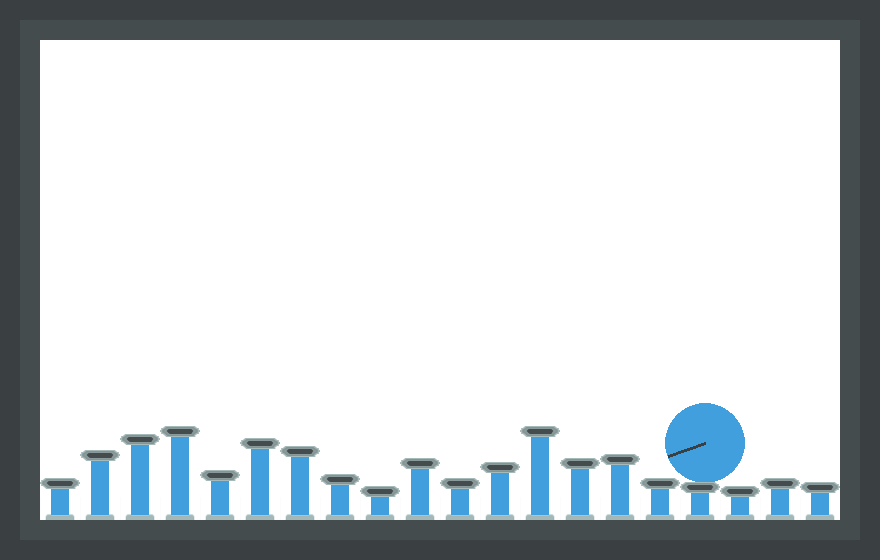

In [ ]:
from IPython.display import Image, display
# Display the uploaded GIF
display(Image(filename="pistonball/pistonball.gif"))